## NHS Post processing Library

This notebook provides examples on how to carry out data evaluation, visualization and analysis using the post_processing python library. Be sure to go through the [Quick Start](https://nhs-postprocessing.readthedocs.io/en/latest/QuickStart.html) section of the [documentation](https://nhs-postprocessing.readthedocs.io/en/latest/index.html) for instructions on how to access and import the libary and its packages.

##### Note: 
The Library is still under active development and empty sections will be completed in Due time

### Table of content
- Requirements
- Data Manipulation(generating and obtaining the Dataframes required)
- Analysis
- Visualizations


##### All files are available in the docs/source/notebooks folder where the notebook is located

### Requirements

The conda environmnent contains all libraries associated the post processing library. After setting up the conda environment, you only have to import the metrics and visualization modules from postprocessinglib.evaluation

In [1]:
### Remove and modify these later.
import sys
import pandas as pd
sys.path.append("../../../")

In [2]:
from postprocessinglib.evaluation import data, metrics, visuals
# from postprocessinglib.utilities import helper_functions as hlp

From this point on, the function you use will depend on which project you are working on and what sort of data i.e., the datatype of the data, you have.

### DATA MANIPULATION

### MESH CSV files

Assuming you have a csv file containing an csv file with observed and simulated values for a list of stations of the form:
| Some datetime  | station1_obs | station1_sim | station2_obs | station2_sim |
| -------------- | ------------ | ------------ | ------------ | ------------ | 

We simply pass it into our generate dataframes function as shown below:


In [3]:
# passing a controlled csv file for testing
path = "MESH_output_streamflow_3.csv"

# assuming the simulation model needs 365 days to warm up and account for errors during the learning phase.
DATAFRAMES = data.generate_dataframes(csv_fpath=path, warm_up=365)

The start date for the Observed Data is 1982-10-02
The start date for the Simulated Data is 1982-10-02
The start date for the Merged Data is 1982-10-02


In this case, because we dont pass in aggregation parameters, we end up with the three default dataframnes in our dictionary; the merged dataframe, the observed data and the simulated data

In [4]:
print("The Merged dataframe: \n")
print(DATAFRAMES["DF"])
print("The Observed dataframe: \n")
print(DATAFRAMES["DF_OBSERVED"])
print("\nThe Simulated dataframe: \n")
print(DATAFRAMES["DF_SIMULATED"])

The Merged dataframe: 

            QOMEAS_05AA024  QOSIM_05AA024  QOMEAS_05AB046  QOSIM_05AB046  \
1982-10-02           15.00      12.727950             NaN       2.151088   
1982-10-03           14.80      12.070300             NaN       1.282258   
1982-10-04           15.20      11.928440             NaN       0.864993   
1982-10-05           15.00      11.873910             NaN       0.662052   
1982-10-06           14.10      11.845160             NaN       0.560041   
...                    ...            ...             ...            ...   
2016-12-27            8.62       0.626161             NaN       0.426263   
2016-12-28            8.64       0.619734             NaN       0.425050   
2016-12-29            8.63       0.612944             NaN       0.423842   
2016-12-30            8.64       0.606437             NaN       0.422638   
2016-12-31            8.61       0.599758             NaN       0.421438   

            QOMEAS_05AC003  QOSIM_05AC003  QOMEAS_05AD007  QOSI

The Simulated and Observed dataframes are particularly important in the calculation of our metrics

In [5]:
# You are also  able to generate the dataframes for a given period of time i.e from a start date, till an end date
# and everything in between
DATAFRAMES_January2010 = data.generate_dataframes(csv_fpath=path, warm_up=365, start_date='2010-01-01' , end_date='2010-1-31')
DATAFRAMES_till2009 = data.generate_dataframes(csv_fpath=path, warm_up=365, end_date='2009-12-31')
DATAFRAMES_from1995 = data.generate_dataframes(csv_fpath=path, warm_up=365, start_date='1995-01-01')

The start date for the Observed Data is 2010-01-01
The start date for the Simulated Data is 2010-01-01
The start date for the Merged Data is 2010-01-01
The start date for the Observed Data is 1982-10-02
The start date for the Simulated Data is 1982-10-02
The start date for the Merged Data is 1982-10-02
The start date for the Observed Data is 1995-01-01
The start date for the Simulated Data is 1995-01-01
The start date for the Merged Data is 1995-01-01


In [6]:
print("The Merged dataframe for January 2010: \n")
print(DATAFRAMES_January2010["DF"])
print("The Observed dataframe for January 2010: \n")
print(DATAFRAMES_January2010["DF_OBSERVED"])
print("\nThe Simulated dataframe for January 2010: \n")
print(DATAFRAMES_January2010["DF_OBSERVED"])

The Merged dataframe for January 2010: 

            QOMEAS_05AA024  QOSIM_05AA024  QOMEAS_05AB046  QOSIM_05AB046  \
2010-01-01            8.98       7.504163             NaN       0.593959   
2010-01-02            8.99       7.303925             NaN       0.609224   
2010-01-03            9.01       7.266646             NaN       0.638858   
2010-01-04            9.03       7.256422             NaN       0.656669   
2010-01-05            9.06       7.250741             NaN       0.662505   
2010-01-06            9.00       7.245835             NaN       0.662842   
2010-01-07            9.00       7.241068             NaN       0.661248   
2010-01-08            9.00       7.236338             NaN       0.659062   
2010-01-09            8.96       7.231628             NaN       0.656713   
2010-01-10            8.95       7.226926             NaN       0.654333   
2010-01-11            8.95       7.222228             NaN       0.651958   
2010-01-12            8.99       7.217576      

In [7]:
print("The Merged dataframe until 2009: \n")
print(DATAFRAMES_till2009["DF"])
print("The Observed dataframe until 2009: \n")
print(DATAFRAMES_till2009["DF_OBSERVED"])
print("\nThe Simulated dataframe until 2009: \n")
print(DATAFRAMES_till2009["DF_SIMULATED"])

The Merged dataframe until 2009: 

            QOMEAS_05AA024  QOSIM_05AA024  QOMEAS_05AB046  QOSIM_05AB046  \
1982-10-02           15.00      12.727950             NaN       2.151088   
1982-10-03           14.80      12.070300             NaN       1.282258   
1982-10-04           15.20      11.928440             NaN       0.864993   
1982-10-05           15.00      11.873910             NaN       0.662052   
1982-10-06           14.10      11.845160             NaN       0.560041   
...                    ...            ...             ...            ...   
2009-12-27            8.93       7.749460             NaN       0.602855   
2009-12-28            8.91       7.748044             NaN       0.600896   
2009-12-29            8.94       7.746631             NaN       0.598952   
2009-12-30            8.99       7.745227             NaN       0.597022   
2009-12-31            9.06       7.743856             NaN       0.595105   

            QOMEAS_05AC003  QOSIM_05AC003  QOMEAS_05

In [8]:
print("The Merged dataframe from 1995: \n")
print(DATAFRAMES_from1995["DF"])
print("The Observed dataframe from 1995: \n")
print(DATAFRAMES_from1995["DF_OBSERVED"])
print("\nThe Simulated dataframe from 1995: \n")
print(DATAFRAMES_from1995["DF_SIMULATED"])

The Merged dataframe from 1995: 

            QOMEAS_05AA024  QOSIM_05AA024  QOMEAS_05AB046  QOSIM_05AB046  \
1995-01-01            6.32       7.281418             NaN       0.662754   
1995-01-02            6.30       6.952250             NaN       0.678679   
1995-01-03            6.56       6.894256             NaN       0.708367   
1995-01-04            6.47       6.882479             NaN       0.724747   
1995-01-05            6.55       6.878763             NaN       0.729202   
...                    ...            ...             ...            ...   
2016-12-27            8.62       0.626161             NaN       0.426263   
2016-12-28            8.64       0.619734             NaN       0.425050   
2016-12-29            8.63       0.612944             NaN       0.423842   
2016-12-30            8.64       0.606437             NaN       0.422638   
2016-12-31            8.61       0.599758             NaN       0.421438   

            QOMEAS_05AC003  QOSIM_05AC003  QOMEAS_05A

You are also able to go a step further by aggregating your data right from the beggining by using the optional arguments 

In [9]:
## Lets use a time period of 1981 to 1990 to demonstrate this
DATAFRAMES = data.generate_dataframes(csv_fpath=path, warm_up=365, start_date = "1981-01-01", end_date = "1990-12-31",
                                      # optional arguments
                                      # lets see a weekly aggregation
                                      daily_agg = True, da_method = 'min',
                                      # lets see a weekly aggregation
                                      weekly_agg = True, wa_method = 'min',
                                      # lets also see monthly aggregation
                                      monthly_agg = True, ma_method = 'inst',
                                      # lets also see yearly aggregation
                                      yearly_agg = True, ya_method = 'sum'
                                      # note that without inputing the respective methods,
                                      # the functions default to mean as the method of aggregation
                                     )
for key, value in DATAFRAMES.items():
    print(f"{key}:\n{value}")
    
# You can uncomment these lines to help with manual confirmation of the data generated 
# DATAFRAMES["DF_WEEKLY"].to_csv('weekly_df.csv')
# DATAFRAMES["DF_MONTHLY"].to_csv('monthly_df.csv')
# DATAFRAMES["DF_YEARLY"].to_csv('yearly_df.csv')

The start date for the Observed Data is 1982-10-02
The start date for the Simulated Data is 1982-10-02
The start date for the Merged Data is 1982-10-02
DF:
            QOMEAS_05AA024  QOSIM_05AA024  QOMEAS_05AB046  QOSIM_05AB046  \
1982-10-02           15.00      12.727950             NaN       2.151088   
1982-10-03           14.80      12.070300             NaN       1.282258   
1982-10-04           15.20      11.928440             NaN       0.864993   
1982-10-05           15.00      11.873910             NaN       0.662052   
1982-10-06           14.10      11.845160             NaN       0.560041   
...                    ...            ...             ...            ...   
1990-12-27            5.30       7.765198             NaN       0.367459   
1990-12-28            5.25       7.763487             NaN       0.366679   
1990-12-29            5.20       7.761784             NaN       0.365901   
1990-12-30            5.20       7.760119             NaN       0.365124   
1990-12-

Observe how the methods inputed dictate the means of aggregation

We are also able to obtain a seasonal period from this step as show below 

In [10]:
DATAFRAMES = data.generate_dataframes(csv_fpath=path, warm_up=365, start_date = "1981-01-01", end_date = "1990-12-31",
                                      # seasonal aggregation
                                      # obtaining the month of January from every year from 1981 to 1985
                                      seasonal_p = True, sp_dperiod = ('04-01', '08-30'),
                                      sp_subset = ('1981-01-01', '1985-12-31')
                                      # if the time range is not specified, it will return the daily period
                                      # for the whole data whose time frame might be specified by the start and
                                      # end date parameters
                                     )
for key, value in DATAFRAMES.items():
    print(f"{key}:\n{value}")

# You can uncomment this line to help with manual confirmation of the data generated 
# DATAFRAMES["DF_CUSTOM"].to_csv('seasonal_df.csv')
# DATAFRAMES["DF_CUSTOM"].head(40)

The start date for the Observed Data is 1982-10-02
The start date for the Simulated Data is 1982-10-02
The start date for the Merged Data is 1982-10-02
DF:
            QOMEAS_05AA024  QOSIM_05AA024  QOMEAS_05AB046  QOSIM_05AB046  \
1982-10-02           15.00      12.727950             NaN       2.151088   
1982-10-03           14.80      12.070300             NaN       1.282258   
1982-10-04           15.20      11.928440             NaN       0.864993   
1982-10-05           15.00      11.873910             NaN       0.662052   
1982-10-06           14.10      11.845160             NaN       0.560041   
...                    ...            ...             ...            ...   
1990-12-27            5.30       7.765198             NaN       0.367459   
1990-12-28            5.25       7.763487             NaN       0.366679   
1990-12-29            5.20       7.761784             NaN       0.365901   
1990-12-30            5.20       7.760119             NaN       0.365124   
1990-12-

Again observe how there is always an observed and simulated dataframe

If the above weekly and daily aggregations werent done at the beginning you are also able to do them whenever you want during your evaluation using their respective functions 

In [11]:
# calculating the daily aggregate outside the generate dataframe function
merged_df = DATAFRAMES["DF"]
print(merged_df)
print(data.daily_aggregate(df=merged_df))

            QOMEAS_05AA024  QOSIM_05AA024  QOMEAS_05AB046  QOSIM_05AB046  \
1982-10-02           15.00      12.727950             NaN       2.151088   
1982-10-03           14.80      12.070300             NaN       1.282258   
1982-10-04           15.20      11.928440             NaN       0.864993   
1982-10-05           15.00      11.873910             NaN       0.662052   
1982-10-06           14.10      11.845160             NaN       0.560041   
...                    ...            ...             ...            ...   
1990-12-27            5.30       7.765198             NaN       0.367459   
1990-12-28            5.25       7.763487             NaN       0.366679   
1990-12-29            5.20       7.761784             NaN       0.365901   
1990-12-30            5.20       7.760119             NaN       0.365124   
1990-12-31            5.50       7.758470             NaN       0.364349   

            QOMEAS_05AC003  QOSIM_05AC003  QOMEAS_05AD007  QOSIM_05AD007  \
1982-10-02 

In [12]:
# We are also able to do the same weekly...
# Recall that the default method is mean
print(data.weekly_aggregate(df=merged_df, method="min"))

         QOMEAS_05AA024  QOSIM_05AA024  QOMEAS_05AB046  QOSIM_05AB046  \
1982.39           15.00      12.727950             NaN       2.151088   
1982.40           12.70      11.792420             NaN       0.450226   
1982.41           11.80      11.780900             NaN       0.414840   
1982.42           11.20      11.773560             NaN       0.401968   
1982.43           13.10      11.772740             NaN       0.384201   
...                 ...            ...             ...            ...   
1990.48           11.60       7.802370             NaN       0.382941   
1990.49            8.68       7.787668             NaN       0.376977   
1990.50            4.80       7.774122             NaN       0.371389   
1990.51            4.90       7.761784             NaN       0.365901   
1990.52            5.20       7.758470             NaN       0.364349   

         QOMEAS_05AC003  QOSIM_05AC003  QOMEAS_05AD007  QOSIM_05AD007  \
1982.39           1.840       1.452520           3

In [13]:
# Monthly...
print(data.monthly_aggregate(df=merged_df, method="inst"))

         QOMEAS_05AA024  QOSIM_05AA024  QOMEAS_05AB046  QOSIM_05AB046  \
1982-10           12.20      11.773340             NaN       0.383104   
1982-11            7.10       9.690101             NaN       0.484195   
1982-12            8.00       7.482027             NaN       0.356147   
1983-01            6.75       6.837620             NaN       0.401397   
1983-02            9.15       6.982893             NaN       0.336749   
...                 ...            ...             ...            ...   
1990-08           17.30      29.963450             NaN       0.652620   
1990-09           10.80      22.526690             NaN       0.317265   
1990-10           17.50      15.164730             NaN       0.348524   
1990-11           16.50      10.033250             NaN       0.440686   
1990-12            5.50       7.758470             NaN       0.364349   

         QOMEAS_05AC003  QOSIM_05AC003  QOMEAS_05AD007  QOSIM_05AD007  \
1982-10           0.840       0.670457           3

In [14]:
# Yearly...
print(data.yearly_aggregate(df=merged_df, method="sum"))

      QOMEAS_05AA024  QOSIM_05AA024  QOMEAS_05AB046  QOSIM_05AB046  \
1982          869.59     879.990410             0.0      45.971122   
1983         9058.11    5564.745514             0.0     617.921304   
1984         7627.19    3947.485575             0.0     387.537221   
1985        10686.09    5537.846413             0.0    1554.529072   
1986        15200.11    9198.638995             0.0     964.735984   
1987        10418.92    7750.936998             0.0    1022.479305   
1988         7415.42    4650.981073             0.0     317.957954   
1989        12389.13    6431.497140             0.0     713.013617   
1990        17644.73   10945.778471             0.0    2152.714239   

      QOMEAS_05AC003  QOSIM_05AC003  QOMEAS_05AD007  QOSIM_05AD007  \
1982          43.537      54.426595         2347.20    1641.869430   
1983         341.410     312.019514        10535.49   17304.921932   
1984         375.083     304.070062         7411.96   14035.103164   
1985         459.21

In [15]:
# and we are also able to obtaining a customized seasonal period from every year in a period...
print(data.seasonal_period(df=merged_df, daily_period=('01-01', '01-31'), subset = ('1981-01-01', '1985-12-31')))

            QOMEAS_05AA024  QOSIM_05AA024  QOMEAS_05AB046  QOSIM_05AB046  \
1983-01-01            8.00       7.213028             NaN       0.355544   
1983-01-02            8.10       6.986197             NaN       0.366087   
1983-01-03            8.15       6.944404             NaN       0.392217   
1983-01-04            8.10       6.934262             NaN       0.413541   
1983-01-05            7.95       6.929586             NaN       0.424135   
...                    ...            ...             ...            ...   
1985-01-27            4.55       0.235822             NaN       0.329186   
1985-01-28            4.45       0.234127             NaN       0.326566   
1985-01-29            4.40       0.232728             NaN       0.323951   
1985-01-30            4.33       0.230764             NaN       0.321356   
1985-01-31            4.20       0.228754             NaN       0.318786   

            QOMEAS_05AC003  QOSIM_05AC003  QOMEAS_05AD007  QOSIM_05AD007  \
1983-01-01 

In [16]:
# and we are also able to obtaining a customized seasonal period or from select years...
print(data.seasonal_period(df=merged_df, daily_period=('01-01', '01-31'), years = [1981, 1983, 1990]))

            QOMEAS_05AA024  QOSIM_05AA024  QOMEAS_05AB046  QOSIM_05AB046  \
1983-01-01            8.00       7.213028             NaN       0.355544   
1983-01-02            8.10       6.986197             NaN       0.366087   
1983-01-03            8.15       6.944404             NaN       0.392217   
1983-01-04            8.10       6.934262             NaN       0.413541   
1983-01-05            7.95       6.929586             NaN       0.424135   
...                    ...            ...             ...            ...   
1990-01-27           10.60       6.817856             NaN       0.386948   
1990-01-28           10.30       6.817148             NaN       0.385864   
1990-01-29           10.00       6.816454             NaN       0.384784   
1990-01-30            9.75       6.815770             NaN       0.383707   
1990-01-31            9.50       6.815091             NaN       0.382632   

            QOMEAS_05AC003  QOSIM_05AC003  QOMEAS_05AD007  QOSIM_05AD007  \
1983-01-01 

Finally, we are able to extract each station from the data

In [17]:
## for ease of code I will rename the variables
DATAFRAMES = data.generate_dataframes(csv_fpath=path, warm_up=365)
observed = DATAFRAMES["DF_OBSERVED"]
simulated = DATAFRAMES["DF_SIMULATED"]

The start date for the Observed Data is 1982-10-02
The start date for the Simulated Data is 1982-10-02
The start date for the Merged Data is 1982-10-02


In [18]:
# You are also able to split the data into their respective stations in the cases where you might want to do so
for station in data.station_dataframe(observed=observed, simulated=simulated):
    print(station)

<mark>Note: As it stands, that is the only kind of data that we it is currently able to handle. In future releases, It will be able to handle more file types including, netcdf file, shape file, arrays, and more.<mark/>

### Analysis

Because the library is in active development, there will be regular removals and additions to its features. As a rule of thumb therefore it is always a good idea to check what it can do at the time of use.

In [19]:
# We do this by calling on its available metrics
for metric in metrics.available_metrics():
    print(metric)

MSE - Mean Square Error
RMSE - Roor Mean Square Error
MAE - Mean Average Error
NSE - Nash-Sutcliffe Efficiency 
NegNSE - Nash-Sutcliffe Efficiency * -1
LogNSE - Log of Nash-Sutcliffe Efficiency
NegLogNSE - Log of Nash-Sutcliffe Efficiency * -1
KGE - Kling-Gupta Efficiency
NegKGE - Kling-Gupta Efficiency * -1
KGE 2012 - Kling-Gupta Efficiency modified as of 2012
BIAS- Prcentage Bias
AbsBIAS - Absolute Value of the Percentage Bias
TTP - Time to Peak
TTCoM - Time to Centre of Mass
SPOD - Spring Pulse ONset Delay
FDC - Flow Duration Curve


Now that we know what it can currently do, we know what we want to ask for.

##### Mean Square Error

In [20]:
# Mean square error for the first station in the data we were given
print(metrics.mse(observed=observed, simulated=simulated))

[1300.0, 780.6, 17.41, 5680.0, 1223.0, 5751.0, 52.79, 16220.0, 85.91, 567.9, 1837.0, 45.48, 88.77, 1915.0, 410.0, 530.4, 4780.0, 6576.0, 81.93, 4998.0, 623.4, 125.0, 1415.0, 2295.0, 39.2, 21.9, 3491.0, 790.1, 11020.0, 1880.0, 1547.0, 1271.0, 13750.0, 51.67, 8.588, 56.16, 17470.0, 22.53, 19.26, 84.72, 178.0, 191.5, 33.01, 85.51, 467.5, 20540.0, 35.41, 24960.0, 62.02, 611.7, 1800.0, 73030.0, 2418.0, 141600.0]


##### Root Mean Square Error

In [21]:
# lets calculate for the root mean square error for the first station in the data we were given
# The syntax goes:-
print(metrics.rmse(observed=observed, simulated=simulated))

[36.06, 27.94, 4.173, 75.37, 34.97, 75.84, 7.265, 127.3, 9.269, 23.83, 42.87, 6.744, 9.422, 43.76, 20.25, 23.03, 69.14, 81.09, 9.051, 70.7, 24.97, 11.18, 37.61, 47.9, 6.261, 4.68, 59.09, 28.11, 105.0, 43.36, 39.34, 35.65, 117.3, 7.188, 2.931, 7.494, 132.2, 4.746, 4.389, 9.204, 13.34, 13.84, 5.745, 9.247, 21.62, 143.3, 5.95, 158.0, 7.876, 24.73, 42.43, 270.2, 49.17, 376.3]


##### Mean Average Error

In [22]:
# Similarly, the mean absolute error for the first station in the data we were given will look like 
print(metrics.mae(observed=observed, simulated=simulated))

[16.66, 6.936, 1.243, 39.67, 21.29, 41.36, 1.566, 80.82, 6.794, 17.75, 36.62, 5.151, 4.13, 36.37, 5.445, 10.48, 46.34, 55.36, 3.372, 46.55, 12.19, 3.996, 18.66, 22.48, 1.257, 2.799, 26.78, 12.22, 59.69, 33.21, 23.11, 25.59, 67.98, 3.121, 1.064, 2.072, 73.95, 1.56, 1.455, 4.327, 5.795, 4.896, 1.828, 2.984, 7.493, 77.87, 1.552, 88.88, 1.916, 8.398, 12.99, 171.8, 18.61, 217.8]


##### Nash-Sutcliffe Efficiency

In [23]:
# Similarly, the Nash-Sutcliffe Efficiency for the first station in the data we were given will look like 
print(metrics.nse(observed=observed, simulated=simulated))

[0.5184, -1.675, -1.99, 0.6108, -1.027, 0.6041, -10.94, 0.6155, 0.3505, 0.6656, 0.3287, -0.4054, -2.133, 0.4598, -1.202, 0.7113, 0.6904, 0.5787, -22.91, 0.4971, 0.4081, -0.1538, 0.5896, 0.477, -14.93, -4.123, 0.3199, -0.893, -0.7522, -1.65, 0.3002, 0.1879, 0.3696, -0.9373, -0.1152, -2.449, 0.3034, -20.09, 0.3191, -0.04169, 0.1615, -0.3901, -41.79, -2.903, -6.679, 0.3414, -0.2099, 0.07746, -3.312, 0.08662, 0.3119, 0.1207, -4.81, -0.1113]


##### Kling-Gupta Efficiency

In [24]:
# Similarly, the Kling-Gupta Efficiency for the first station in the data we were given will look like 
print(metrics.kge(observed=observed, simulated=simulated))

[0.5122, -0.1113, -0.02006, 0.7649, -0.486, 0.7475, -1.764, 0.7971, 0.5879, 0.5855, 0.579, 0.09395, -0.2227, 0.6155, -0.1798, 0.7243, 0.7723, 0.7013, -2.938, 0.703, 0.5203, 0.3802, 0.7602, 0.6984, -2.209, -0.4833, 0.6514, -0.005068, 0.08966, 0.03866, 0.6391, 0.4366, 0.5986, 0.2168, 0.4205, -0.1545, 0.6207, -3.1, 0.2623, 0.2741, 0.279, 0.3828, -7.081, -0.8519, -1.297, 0.6372, -0.08271, 0.5764, -0.3758, 0.217, 0.26, 0.586, -0.7698, 0.4607]


##### The Updated Kling-Gupta Efficiency (2012)

In [25]:
# Similarly, the Kling-Gupta Efficiency for the first station in the data we were given will look like 
print(metrics.kge_2012(observed=observed, simulated=simulated))

[0.5584, 0.08006, -0.2077, 0.7335, -0.4644, 0.7146, -2.162, 0.8081, 0.3096, 0.3618, 0.1013, 0.1034, -0.1818, 0.2015, 0.3289, 0.5851, 0.7124, 0.7557, -10.48, 0.6175, 0.6536, -0.199, 0.6657, 0.6519, -0.6773, -7.049, 0.5821, 0.1741, -0.08581, 0.007883, 0.4891, 0.2117, 0.4074, -0.1229, 0.4835, -0.2313, 0.4416, -0.8627, 0.3351, 0.0001662, 0.05332, 0.1882, -4.991, -0.5441, -0.1838, 0.5153, -0.1145, 0.5918, -1.123, -0.02984, 0.3707, 0.6214, -0.07129, 0.4228]


##### Percentage Bias

In [26]:
# Similarly, the Percentage Bias for the first station in the data we were given will look like 
print(metrics.bias(observed=observed, simulated=simulated))

# Observed that it returns the percentage not the actual value i.e 27% not 0.27

[-34.2, 11.5, -13.68, 13.25, 133.1, 16.39, -9.97, 1.92, -19.81, -38.92, -35.49, -48.51, 2.078, -33.84, 41.2, -23.81, -5.474, 18.57, -61.55, -8.078, 11.38, -35.98, -10.97, -15.79, 100.4, -77.5, -14.21, 10.49, -8.904, -36.34, -16.8, -13.5, -14.09, -24.97, 31.25, -4.485, -15.34, 149.0, -48.31, -47.47, -51.86, -20.76, 593.7, 138.8, 77.08, -10.75, -57.4, 6.418, -27.7, -53.8, -45.43, 5.266, 51.8, -3.15]


##### Time to Peak

In [27]:
# Similarly, the Time to Peak for the simulated data from the first station in the data we were given will look like 
print(metrics.time_to_peak(df=simulated))

# The time to peak for the observed data for the same station looks like:-
print(metrics.time_to_peak(df=observed))

[171.0, 177.0, 176.0, 169.0, 167.0, 170.0, 211.0, 175.0, 165.0, 156.0, 157.0, 168.0, 176.0, 162.0, 165.0, 172.0, 171.0, 171.0, 182.0, 176.0, 168.0, 188.0, 187.0, 183.0, 195.0, 172.0, 186.0, 174.0, 173.0, 211.0, 187.0, 175.0, 184.0, 146.0, 147.0, 152.0, 184.0, 160.0, 139.0, 143.0, 159.0, 176.0, 188.0, 169.0, 149.0, 176.0, 166.0, 208.0, 153.0, 146.0, 145.0, 177.0, 144.0, 156.0]
[158.0, 157.0, 157.0, 159.0, 185.0, 160.0, 171.0, 172.0, 175.0, 166.0, 164.0, 178.0, 189.0, 169.0, 166.0, 164.0, 169.0, 166.0, 189.0, 166.0, 172.0, 162.0, 168.0, 158.0, 168.0, 191.0, 155.0, 184.0, 177.0, 179.0, 184.0, 184.0, 173.0, 119.0, 115.0, 118.0, 171.0, 118.0, 129.0, 123.0, 134.0, 123.0, 109.0, 112.0, 132.0, 157.0, 112.0, 154.0, 123.0, 105.0, 107.0, 150.0, 163.0, 139.0]


##### Time to Centre of Mass

In [28]:
# Similarly, the Time to Peak for the simulated data from the first station in the data we were given will look like 
print(metrics.time_to_centre_of_mass(df=simulated))

# The time to peak for the observed data for the same station looks like:-
print(metrics.time_to_centre_of_mass(df=observed))

[185.0, 166.0, 188.0, 183.0, 187.0, 186.0, 191.0, 186.0, 190.0, 183.0, 181.0, 159.0, 175.0, 185.0, 176.0, 170.0, 182.0, 182.0, 191.0, 184.0, 187.0, 176.0, 190.0, 190.0, 191.0, 178.0, 193.0, 187.0, 193.0, 205.0, 188.0, 189.0, 190.0, 154.0, 150.0, 164.0, 189.0, 148.0, 163.0, 166.0, 172.0, 173.0, 191.0, 181.0, 154.0, 188.0, 170.0, 193.0, 159.0, 160.0, 160.0, 189.0, 156.0, 185.0]
[177.0, 179.0, 182.0, 178.0, 188.0, 180.0, 195.0, 178.0, 199.0, 194.0, 186.0, 173.0, 204.0, 186.0, 186.0, 177.0, 190.0, 187.0, 211.0, 177.0, 194.0, 172.0, 182.0, 177.0, 173.0, 207.0, 179.0, 195.0, 200.0, 184.0, 182.0, 202.0, 183.0, 149.0, 133.0, 136.0, 182.0, 149.0, 154.0, 148.0, 146.0, 156.0, 114.0, 129.0, 151.0, 181.0, 150.0, 187.0, 139.0, 125.0, 138.0, 173.0, 178.0, 180.0]


##### Spring Pulse Onset Delay

In [29]:
# Similarly, the Time to Peak for the simulated data from the first station in the data we were given will look like 
print(metrics.SpringPulseOnset(df=simulated))

# The time to peak for the observed data for the same station looks like:-
print(metrics.SpringPulseOnset(df=observed))

[219.0, 218.93939393939394, 207.0, 206.57575757575756, 218.0, 217.84848484848484, 210.0, 209.96969696969697, 211.0, 210.8181818181818, 213.0, 212.66666666666666, 223.0, 222.93939393939394, 215.0, 215.21212121212122, 231.0, 230.9090909090909, 219.0, 218.63636363636363, 217.0, 217.0, 44.4, 44.42424242424242, 205.0, 204.72727272727272, 226.0, 226.3939393939394, 213.0, 212.57575757575756, 201.0, 201.12121212121212, 215.0, 214.6060606060606, 217.0, 216.6969696969697, 250.0, 249.57575757575756, 219.0, 219.1818181818182, 219.0, 219.21212121212122, 214.0, 214.33333333333334, 233.0, 233.36363636363637, 236.0, 235.84848484848484, 252.0, 252.03030303030303, 224.0, 224.4848484848485, 236.0, 235.63636363636363, 213.0, 213.06060606060606, 210.0, 210.33333333333334, 208.0, 208.36363636363637, 232.0, 232.27272727272728, 229.0, 228.8181818181818, 212.0, 211.6969696969697, 200.0, 200.24242424242425, 190.0, 190.0, 204.0, 204.3939393939394, 212.0, 212.24242424242425, 187.0, 187.36363636363637, 201.0, 200.

C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[204.0, 203.61290322580646, nan, nan, 192.0, 192.3548387096774, 205.0, 204.6060606060606, 209.0, 208.6969696969697, 206.0, 206.21212121212122, nan, nan, 194.0, 193.87878787878788, 234.0, 233.5, 228.0, 227.57575757575756, 229.0, 229.3939393939394, 70.7, 70.66666666666667, 263.0, 262.75, 230.0, 229.8181818181818, 221.0, 221.0909090909091, 210.0, 210.06060606060606, nan, nan, nan, nan, nan, nan, 216.0, 215.9090909090909, 226.0, 226.0, 192.0, 192.15625, 204.0, 203.63636363636363, 194.0, 194.03030303030303, nan, nan, nan, nan, 199.0, 198.54545454545453, 229.0, 229.45454545454547, nan, nan, 178.0, 178.0, 212.0, 211.9375, nan, nan, 197.0, 196.72727272727272, nan, nan, nan, nan, nan, nan, 192.0, 192.03125, nan, nan, 184.0, 184.28125, nan, nan, nan, nan, 180.0, 180.06060606060606, nan, nan, nan, nan, nan, nan, 189.0, 189.0909090909091, 160.0, 160.48387096774192, 137.0, 136.53571428571428, nan, nan, nan, nan, 192.0, 192.46666666666667, 177.0, 176.66666666666666, 199.0, 199.125, 190.0, 190.322580

##### Multiple metrics

In [30]:
# You are also able to calculate possible available metrics 
for key, value in metrics.calculate_all_metrics(observed=observed, simulated=simulated).items():
    print(f"{key}: {value}")

MSE: [1300.0, 780.6, 17.41, 5680.0, 1223.0, 5751.0, 52.79, 16220.0, 85.91, 567.9, 1837.0, 45.48, 88.77, 1915.0, 410.0, 530.4, 4780.0, 6576.0, 81.93, 4998.0, 623.4, 125.0, 1415.0, 2295.0, 39.2, 21.9, 3491.0, 790.1, 11020.0, 1880.0, 1547.0, 1271.0, 13750.0, 51.67, 8.588, 56.16, 17470.0, 22.53, 19.26, 84.72, 178.0, 191.5, 33.01, 85.51, 467.5, 20540.0, 35.41, 24960.0, 62.02, 611.7, 1800.0, 73030.0, 2418.0, 141600.0]
RMSE: [36.06, 27.94, 4.173, 75.37, 34.97, 75.84, 7.265, 127.3, 9.269, 23.83, 42.87, 6.744, 9.422, 43.76, 20.25, 23.03, 69.14, 81.09, 9.051, 70.7, 24.97, 11.18, 37.61, 47.9, 6.261, 4.68, 59.09, 28.11, 105.0, 43.36, 39.34, 35.65, 117.3, 7.188, 2.931, 7.494, 132.2, 4.746, 4.389, 9.204, 13.34, 13.84, 5.745, 9.247, 21.62, 143.3, 5.95, 158.0, 7.876, 24.73, 42.43, 270.2, 49.17, 376.3]
MAE: [16.66, 6.936, 1.243, 39.67, 21.29, 41.36, 1.566, 80.82, 6.794, 17.75, 36.62, 5.151, 4.13, 36.37, 5.445, 10.48, 46.34, 55.36, 3.372, 46.55, 12.19, 3.996, 18.66, 22.48, 1.257, 2.799, 26.78, 12.22, 59

Note: There will be an option to have this returned in a text file for easy observation in the coming days

In [31]:
# Naturally, you are also able to calculate a few metrics at a time but putting then in a list and passing them into the function
# as shown below
metrices = ["MSE", "RMSE", "MAE", "NSE", "NegNSE", "LogNSE"]
for key, value in metrics.calculate_metrics(observed=observed, simulated=simulated, metrices=metrices).items():
    print(f"{key}: {value}")

MSE: [1300.0, 780.6, 17.41, 5680.0, 1223.0, 5751.0, 52.79, 16220.0, 85.91, 567.9, 1837.0, 45.48, 88.77, 1915.0, 410.0, 530.4, 4780.0, 6576.0, 81.93, 4998.0, 623.4, 125.0, 1415.0, 2295.0, 39.2, 21.9, 3491.0, 790.1, 11020.0, 1880.0, 1547.0, 1271.0, 13750.0, 51.67, 8.588, 56.16, 17470.0, 22.53, 19.26, 84.72, 178.0, 191.5, 33.01, 85.51, 467.5, 20540.0, 35.41, 24960.0, 62.02, 611.7, 1800.0, 73030.0, 2418.0, 141600.0]
RMSE: [36.06, 27.94, 4.173, 75.37, 34.97, 75.84, 7.265, 127.3, 9.269, 23.83, 42.87, 6.744, 9.422, 43.76, 20.25, 23.03, 69.14, 81.09, 9.051, 70.7, 24.97, 11.18, 37.61, 47.9, 6.261, 4.68, 59.09, 28.11, 105.0, 43.36, 39.34, 35.65, 117.3, 7.188, 2.931, 7.494, 132.2, 4.746, 4.389, 9.204, 13.34, 13.84, 5.745, 9.247, 21.62, 143.3, 5.95, 158.0, 7.876, 24.73, 42.43, 270.2, 49.17, 376.3]
MAE: [16.66, 6.936, 1.243, 39.67, 21.29, 41.36, 1.566, 80.82, 6.794, 17.75, 36.62, 5.151, 4.13, 36.37, 5.445, 10.48, 46.34, 55.36, 3.372, 46.55, 12.19, 3.996, 18.66, 22.48, 1.257, 2.799, 26.78, 12.22, 59

### Visualizations

<mark>Note: The visualization modules are still under review<mark/>

In [32]:
visuals.plot(
    # merged_df = DATAFRAMES["DF"]['1981-01-01':'1990-12-31'],
    df = DATAFRAMES["DF_SIMULATED"]['1981-01-01':'1990-12-31'],
    title='Hydrograph of the time series from 1981-1990',
    # linestyles=['r-', 'b-'],
    linestyles=['c-'],
    labels=['Datetime', 'Streamflow'],
    metrices=['KGE'],
    # linewidth = [.75, 1.25],
    linewidth = [1.25],
    )

In [33]:
sim_monthly = data.monthly_aggregate(df=simulated)
obs_monthly = data.monthly_aggregate(df=observed)
Stations_by_monthly = data.station_dataframe(observed=obs_monthly, simulated=sim_monthly)
# plot of the second station in the dataframe within the time period aggregated monthly by mean(default)
# visuals.plot(merged_df = Stations_by_monthly[0]['1981-01':'1990-12'],
#             title='Hydrograph of the time series aggregated monthly from 1981-1990',
#             linestyles=['r-', 'b-'],
#             labels=['Datetime', 'Streamflow'],
#             metrices=['RMSE', 'MSE', 'PBIAS'],
#             grid = True
#             )
Stations_by_monthly

[]

In [34]:
visuals.scatter(merged_df = DATAFRAMES['DF']['1981-01-01':'1985-01-31'],
               grid = True,
               labels = ("Simulated", "Observed"),
               markerstyle = 'b.',
               title = "Scatterplot of January 1981 to January 1985",
               line45 = True,
               metrices = ['KGE', 'RMSE'],
               )

C:\Users\udenzeU\Desktop\JUPYTER\postprocessing\docs\source\notebooks\../../..\postprocessinglib\evaluation\metrics.py:533: RuntimeWarning: invalid value encountered in scalar divide
  mean_observed = mean_observed / num_valid
C:\Users\udenzeU\Desktop\JUPYTER\postprocessing\docs\source\notebooks\../../..\postprocessinglib\evaluation\metrics.py:534: RuntimeWarning: invalid value encountered in scalar divide
  mean_simulated = mean_simulated / num_valid
C:\Users\udenzeU\Desktop\JUPYTER\postprocessing\docs\source\notebooks\../../..\postprocessinglib\evaluation\metrics.py:542: RuntimeWarning: invalid value encountered in scalar divide
  r = sum / np.sqrt(std_simulated * std_observed)
C:\Users\udenzeU\Desktop\JUPYTER\postprocessing\docs\source\notebooks\../../..\postprocessinglib\evaluation\metrics.py:550: RuntimeWarning: invalid value encountered in scalar divide
  a = std_simulated / std_observed
C:\Users\udenzeU\Desktop\JUPYTER\postprocessing\docs\source\notebooks\../../..\postprocessing

In [35]:
# There is an optional dependency required with using read_excel so first we install it
# !pip install openpyxl

path_output_2 = "MESH_output_streamflow_2.csv"
path_input_2 = "Station_data.xlsx"


#### Newer data
DATA_2 = data.generate_dataframes(csv_fpath=path_output_2, warm_up=365,
                                 # long term
                                 long_term = True, lt_method = ["q33.33", "median" ,'q75' ,'Q25' ,'q33' ],)
Stations_2 = pd.read_excel(io=path_input_2)

ignore = []
for i in range(0, len(Stations_2)):
    if Stations_2['Properties'][i] == 'X':
        ignore.append(i)

Stations_2 = Stations_2.drop(Stations_2[Stations_2['Properties'] == 'X'].index)
Stations_2 = Stations_2.set_index('Station Number')

for i in reversed(ignore):
    DATA_2['DF'] = DATA_2['DF'].drop(columns = DATA_2['DF'].columns[[2*i, 2*i+1]])
    DATA_2["DF_OBSERVED"] = DATA_2["DF_OBSERVED"].drop(columns = DATA_2['DF_OBSERVED'].columns[i])
    DATA_2['DF_SIMULATED']  = DATA_2["DF_SIMULATED"].drop(columns = DATA_2['DF_SIMULATED'].columns[i]) 


The start date for the Observed Data is 1982-10-02
The start date for the Simulated Data is 1982-10-02
The start date for the Merged Data is 1982-10-02


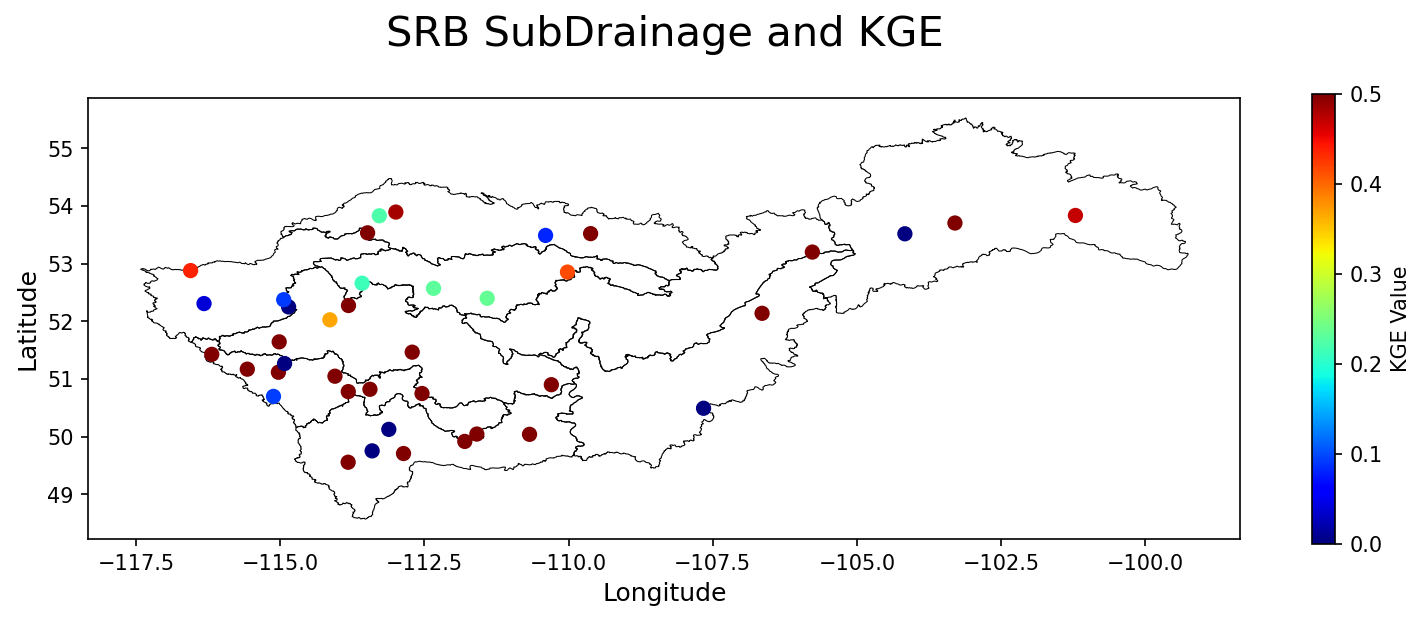

In [36]:
shapefile_path = r"SaskRB_SubDrainage2.shp"

visuals.scatter(shapefile_path = shapefile_path,
                        title = "SRB SubDrainage and KGE",
                        x_axis = Stations_2["Lon"],
                        y_axis = Stations_2["Lat"],
                        metric = "KGE",
                        fig_size = (24, 30),
                        observed = DATA_2["DF_OBSERVED"],
                        simulated = DATA_2["DF_SIMULATED"],
                        labels=['Longitude', 'Latitude'],
                cmap = 'jet', vmin = 0, vmax=0.5
                    )

In [37]:
visuals.scatter(merged_df = DATAFRAMES['DF']['1981-01-01':'1985-01-31'],
               grid = True,
               labels = ("Simulated", "Observed"),
               markerstyle = 'b.',
               title = "Scatterplot of January 1981 to January 1985",
               line45 = True,
               metrices = ['KGE', 'RMSE'],
               )

C:\Users\udenzeU\Desktop\JUPYTER\postprocessing\docs\source\notebooks\../../..\postprocessinglib\evaluation\metrics.py:533: RuntimeWarning: invalid value encountered in scalar divide
  mean_observed = mean_observed / num_valid
C:\Users\udenzeU\Desktop\JUPYTER\postprocessing\docs\source\notebooks\../../..\postprocessinglib\evaluation\metrics.py:534: RuntimeWarning: invalid value encountered in scalar divide
  mean_simulated = mean_simulated / num_valid
C:\Users\udenzeU\Desktop\JUPYTER\postprocessing\docs\source\notebooks\../../..\postprocessinglib\evaluation\metrics.py:542: RuntimeWarning: invalid value encountered in scalar divide
  r = sum / np.sqrt(std_simulated * std_observed)
C:\Users\udenzeU\Desktop\JUPYTER\postprocessing\docs\source\notebooks\../../..\postprocessinglib\evaluation\metrics.py:550: RuntimeWarning: invalid value encountered in scalar divide
  a = std_simulated / std_observed
C:\Users\udenzeU\Desktop\JUPYTER\postprocessing\docs\source\notebooks\../../..\postprocessing

In [38]:
DATAFRAMES = data.generate_dataframes(csv_fpath=path_output_2, warm_up=365, start_date = "1981-01-01", end_date = "1990-12-31",
                                      # optional arguments
                                      # lets see a weekly aggregation
                                      daily_agg = True, da_method = 'min',
                                      # lets see a weekly aggregation
                                      weekly_agg = True, wa_method = 'min',
                                      # lets also see monthly aggregation
                                      monthly_agg = True, ma_method = 'inst',
                                      # lets also see yearly aggregation
                                      yearly_agg = True, ya_method = 'sum',
                                      # seasonal aggregation
                                      # obtaining the month of January from every year from 1981 to 1985
                                      seasonal_p = True, sp_dperiod = ('04-01', '08-30'),
                                      sp_subset = ('1981-01-01', '1985-12-31'),
                                      # long term
                                      long_term = True, lt_method = ["q33.33", "median" ,'q75' ,'Q25' ,'q33' ],
                                     )
for key, value in DATAFRAMES.items():
    print(f"{key}:\n{value}")

The start date for the Observed Data is 1982-10-02
The start date for the Simulated Data is 1982-10-02
The start date for the Merged Data is 1982-10-02
DF:
            QOMEAS1     QOSIM1  QOMEAS2    QOSIM2  QOMEAS3    QOSIM3  QOMEAS4  \
1982-10-02    15.00  12.710840      NaN  2.124695    1.840  1.442218     37.6   
1982-10-03    14.80  12.064640      NaN  1.266883    1.840  1.223653     39.6   
1982-10-04    15.20  11.925050      NaN  0.854982    1.690  1.083362     38.7   
1982-10-05    15.00  11.872900      NaN  0.654379    1.580  0.989998     37.6   
1982-10-06    14.10  11.844660      NaN  0.553681    1.430  0.916533     29.8   
...             ...        ...      ...       ...      ...       ...      ...   
1990-12-27     5.30   7.612625      NaN  0.338567    0.105  0.521116     15.1   
1990-12-28     5.25   7.611866      NaN  0.337703    0.126  0.537318     19.7   
1990-12-29     5.20   7.611101      NaN  0.336841    0.042  0.548557     22.3   
1990-12-30     5.20   7.610342    

In [39]:
visuals.bounded_plot(
    lines = merged_df,
    upper_bounds = upper_bounds,
    lower_bounds = lower_bounds,
    title=['05AD007-OLDMAN RIVER NEAR LETHBRIDGE'],
    linestyles=['b-', 'r-'],
    labels=['Datetime', 'Streamflow'],
    grid=True,
    transparency = [0.3, 0.3],
    )

NameError: name 'upper_bounds' is not defined

In [ ]:
visuals.scatter(merged_df = DATAFRAMES['DF']['1990-01-01':'1990-12-31'].iloc[:, [10, 11]],
labels=("Observed", "Simulated"),
title="Scatter Plot Example",
   grid=True,
    metrices = ['KGE','RMSE'],
   line45=True,
  markerstyle = 'b.',

               )

In [ ]:
visuals.bounded_plot(
    lines = DATA_2["LONG_TERM_MEDIAN"].iloc[:, [8,9]],
    upper_bounds = [DATA_2["LONG_TERM_MAX"].iloc[:, [8,9]]],
    lower_bounds = [DATA_2["LONG_TERM_MIN"].iloc[:, [8,9]]],
    # upper_bounds = [DATAFRAMES["LONG_TERM_Q75"]],
    # lower_bounds = [DATAFRAMES["LONG_TERM_Q25"]],
#     title=['Long Term Aggregation by days of the Year', 12.55],
    linestyles=['b', 'r-'],
    labels=['Datetime', 'Streamflow'],
    grid=True,
    transparency = [0.4, 0.3],
    )

In [ ]:
visuals.bounded_plot(
  lines = merged_df,
  upper_bounds = upper_bounds,
  lower_bounds = lower_bounds,
  title=['Long Term Aggregation by days of the Year'],
  legend = ['Predicted Streamflow','Recorded Streamflow'],
  linestyles=['k', 'r-'],
  labels=['Days of the year', 'Streamflow Values'],
  transparency = [0.4, 0.7],
  save = True,
  save_as = "b_plot_1", dir= '../b_plots'
)

In [ ]:
visuals.qqplot(
    merged_df = DATAFRAMES["DF"]['1990-01-01':'1990-12-31'].iloc[:, [6,7, 8,9]],
    title=['05AD007 - OLDMAN RIVER NEAR LETHBRIDGE - 1990','05AG006 - OLDMAN RIVER NEAR THE MOUTH- 1990'],
    linestyle = ['b.','r-.','r-'],
    labels=["Quantiles (Simulated)", "Quantiles (Observed)"],
    linewidth = [.75, 1.25],
    legend = True, grid = True,
#     save = True
    )

In [40]:
index = pd.date_range(start="2022-01-01", periods=50, freq="D")

In [41]:
import numpy as np

In [42]:

obs_df = pd.DataFrame({
"Station1": np.random.rand(50),
# "Station2": np.random.rand(50)
}, index=index)
# obs_df

In [43]:
sim_df = pd.DataFrame({
"Station1": np.random.rand(50),
# "Station2": np.random.rand(50)
}, index=index)
# sim_df

In [44]:
merged_df = pd.DataFrame({
    "obs": obs_df["Station1"],
    "sim": sim_df["Station1"]
})

In [ ]:
visuals.plot(merged_df = merged_df,
             title='Simulated vs Observed',
             labels=['Time', 'Value'],
             grid=True,
             metrices = ['KGE','RMSE'],
             save = True,
             save_as = "plot1_example",
             dir = "../Figures"
            )

In [ ]:
visuals.plot(obs_df = obs_df,
             sim_df = sim_df,
             linestyles=('g-', 'b-'),
             linewidth=(1.5, 1.25),
             save = True,
             save_as = "plot_example"
             dir = "./plots"
            )

In [ ]:
visuals.plot(df=obs_df,
             grid=True,
             title="Single Line Plot",
             labels=("Time", "Value"),
             legend = ['Single line Data']
             fig_size=(9, 5)
            )


In [ ]:
upper_bounds = [
   pd.DataFrame({
        "Obs_Upper": np.random.rand(50) + 0.1,
       "Sim_Upper": np.random.rand(50) + 0.1,
   }, index=index)
]


In [ ]:
lower_bounds = [
   pd.DataFrame({
        "Obs_Lower": np.random.rand(50) - 0.1,
       "Sim_Lower": np.random.rand(50) - 0.1,
   }, index=index)
]


In [ ]:
visuals.bounded_plot(
  lines=merged_df,
  upper_bounds=upper_bounds,
  lower_bounds=lower_bounds,
  legend=('Simulated Data', 'Observed Data'),
  title=['Observed Data'],
  labels=('Time', 'Flow'),
  grid=True,
#   save=False,
#   save_as = ''
)

In [ ]:
visuals.scatter(
     obs_df=obs_df,
   sim_df=sim_df,
     labels=("Observed", "Simulated"),
         title="Scatter Plot Example",
         best_fit=True,
         line45=True,
#          save=True,
#          save_as="scatter_plot_example.png"
     )

In [46]:
visuals.qqplot(
    merged_df = merged_df,
#     title=['Title'],
#     linestyle = ['bo','r-.','r-'],
    labels=["Quantiles (Simulated)", "Quantiles (Observed)"],
    title="QQ Plot Example",
#     linewidth = [.75, 1.25],
#     legend = True,
#     grid = True,
    save=True,
    save_as="qqplot_example",
    dir = '../Figures'
)

In [ ]:
visuals.qqplot(
    merged_df = merged_df,
    title=['QQ plot'],
    linestyle = ['r*','b-.','k-'],
    labels=["Simulated", "Observed"],
    linewidth = [1.25, 1.25],
    legend = True,
    q_labels = ['Q Values',
                "Range of Q's",
                "Upper Band Quartile"],
    quantile = [75, 100],
    grid = True,
)